In [218]:
## REQUIERE QUE ARCHIVOS DE ENTRADA Y DE PARAMETROS ESTEN EN LA MISMA CARPETA (o DIRECTORIO) 

## RESPETAR ORDEN DE COLUMNAS DATAFRAME

In [219]:
## IMPORTACION LIBRERIAS

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

from mpl_toolkits import mplot3d
%matplotlib inline

In [220]:
import os
import numpy as np
import pandas as pd
import re
from unidecode import unidecode
from tqdm.notebook import trange, tqdm
import time
import math

In [221]:


## Lectura archivo de parámetros:
'''       '    como texto separador 
'''

os.listdir()     #Archivos de parámetros:   'CLAG1.par', 'localcap.run'

print(open("CLAG1.par", "r").read())
                                #print(f.readlines())     <-- En caso testear caracteres ocultos


'''     Para evitar errores futuros se utiliza RegEx (En función del separador y no de la posición)
        cada linea del archivo de parámetros tiene un   '     como separador 
        --> separación tipo:       VALOR PARAMËTRO    '    NOMBRE  PARÄMETRO
'''

open("CLAG1.par", "r").close()

Capping Test Copper Using BHID                                            '\header
D:\001_CLOCAL_GRP1\CLAG_MR2022.csv                                        '\input file
1,2,3,4,6,5,7,8                                                           '\columns for data, Record Number,x,y,z,code,grade,zone
30.,30.,30.                                                               '\initial search volume
6                                                                         '\Number of Risk Thresholds to consider (maximum of 6)
0.100,0.125,0.150,0.175,0.200,0.225                                       '\selected risk thresholds
21                                                                        '\number of data in local volume
21                                                                        '\number of units
1,2,10,11,13,14,16,19,20,22,23,31,32,34,35,36,37,50,51,52,53              '\unit names
0                                                                         '\do not con

In [222]:
l=[re.split("[']", x) for x in open("CLAG1.par", "r")]
    #print(x)
open("CLAG1.par", "r").close()            #cerrar archivo 


## diccionario de parámetros
param={}
param_l=[]
paran_v=[]

## OJO!! 
# Separador no es el mismo en todos los SO -->  Usar OS

l[0][1].strip() #     ==  os.sep


'\\header'

In [223]:
## header:          PARÁMETRO 1

param[1]=l[0][0].strip()
param_l.append(l[0][1].strip().replace(os.sep,""))

## input file:          PARÁMETRO 2

param[2]=l[1][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[1][1].strip().replace(os.sep,""))

## columns for data:          PARÁMETRO 3

param[3]=[int(x) for x in l[2][0].strip().split(",")]
param_l.append(l[2][1].strip().replace(os.sep,"")[0:16])

## initial search volume:          PARÁMETRO 4

param[4]=[float(x) for x in l[3][0].strip().split(",")]
param_l.append(l[3][1].strip().replace(os.sep,""))

## Number of Risk Thresholds:          PARÁMETRO 5

param[5]=[int(x) for x in l[4][0].strip().split(",")]
param_l.append(l[4][1].strip().replace(os.sep,"")[0:37])

## Selected risk thresholds:          PARÁMETRO 6

param[6]=[float(x) for x in l[5][0].strip().split(",")]
param_l.append(l[5][1].strip().replace(os.sep,""))

## Number of data in local volume:          PARÁMETRO 7

param[7]=[int(x) for x in l[6][0].strip().split(",")]
param_l.append(l[6][1].strip().replace(os.sep,""))

## Number of units:          PARÁMETRO 8

param[8]=[int(x) for x in l[7][0].strip().split(",")]
param_l.append(l[7][1].strip().replace(os.sep,""))

## Unit names:          PARÁMETRO 9

param[9]=[int(x) for x in l[8][0].strip().split(",")]
param_l.append(l[8][1].strip().replace(os.sep,""))

## not consider values less than:          PARÁMETRO 10

param[10]=[int(x) for x in l[9][0].strip().split(",")]
param_l.append(l[9][1].strip().replace(os.sep,""))

## output files name:          PARÁMETRO 11

param[11]=l[10][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[10][1].strip().replace(os.sep,""))

## number of zones:          PARÁMETRO 12

param[12]=[int(x) for x in l[11][0].strip().split(",")]
param_l.append(l[11][1].strip().replace(os.sep,""))

## zone identifiers:          PARÁMETRO 13

param[13]=[int(x) for x in l[12][0].strip().split(",")]
param_l.append(l[12][1].strip().replace(os.sep,""))

## azimuth of search orientation per zone :          PARÁMETRO 14

param[14]=[int(x) for x in l[13][0].strip().split(",")]
param_l.append(l[13][1].strip().replace(os.sep,""))

## Anisotropy ratios:          PARÁMETRO 15

param[15]=[float(x) for x in l[14][0].strip().split(",")]
param_l.append(l[14][1].strip().replace(os.sep,""))

## Exclude data from the same drillhole:          PARÁMETRO 16

param[16]=[int(x) for x in l[15][0].strip().split(",")]
param_l.append(l[15][1].strip().replace(os.sep,""))

## Option to weight data by search expansion:          PARÁMETRO 17

param[17]=[int(x) for x in l[16][0].strip().split(",")]
param_l.append(l[16][1].strip().replace(os.sep,""))


In [224]:
df_parametros = pd.DataFrame(list(zip(list(range(1,18)), param_l, list(param.values()))),
                             columns=['Orden','Descripcion', 'Valor']
                            )
df_parametros

,Orden,Descripcion,Valor
0,1,header,Capping Test Copper Using BHID
1,2,input file,CLAG_MR2022.csv
2,3,columns for data,"[1, 2, 3, 4, 6, 5, 7, 8]"
3,4,initial search volume,"[30.0, 30.0, 30.0]"
4,5,Number of Risk Thresholds to consider,[6]
5,6,selected risk thresholds,"[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]"
6,7,number of data in local volume,[21]
7,8,number of units,[21]
8,9,unit names,"[1, 2, 10, 11, 13, 14, 16, 19, 20, 22, 23, 31,..."
9,10,do not consider values less than,[0]


In [225]:
# $$   LECTURA ARCHIVO INICIAL

df_CLAG_MR_2022 = pd.read_csv(param[2])
df_CLAG_MR_2022.head(2)
## Requerimiento: No NaN ni missing values

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [226]:
# $$   FUNCION  NO MISSING  (REQUERIMIENTO DE DATASET)

'''
Algoritmo localcapping no admite valores nulos ni missings
función missing_val(df) identifica casos missing y nulos
'''

def missing_val(df):
    cero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mz_table = pd.concat([cero_val, mis_val], axis=1)
    mz_table = mz_table.rename(
               columns = {0 : 'Valores  Cero', 1 : 'Valores Missing'})
    mz_table['Total Cero + Missing'] = mz_table['Valores  Cero'] + mz_table['Valores Missing']
    mz_table = mz_table[mz_table.iloc[:,1] != 0].round(1)
    print ("Df Columnas: " + str(df.shape[1]) + " Df Filas: " + str(df.shape[0]) + " \n"      
            "Columnas con Ceros / Missing: " + str(mz_table.shape[0]))
    return mz_table

## 
missing_val(df_CLAG_MR_2022)       

Df Columnas: 8 Df Filas: 379769 
Columnas con Ceros / Missing: 0


,Valores Cero,Valores Missing,Total Cero + Missing


In [227]:
df_CLAG_MR_2022

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.30,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.30,10.190001,31,22,A001
2,4,3543.68,5036.82,4236.30,6.200000,31,22,A001
3,5,3543.68,5036.82,4233.30,9.640000,31,22,A001
4,6,3543.68,5036.82,4230.90,43.711109,31,22,A001
...,...,...,...,...,...,...,...,...
379764,398125,3958.75,6238.25,4377.40,0.150000,11,12,AC5
379765,398126,3958.75,6238.25,4374.40,0.150000,11,12,AC5
379766,398127,3958.75,6238.25,4371.50,0.150000,11,12,AC5
379767,398229,2912.63,4461.27,4102.73,0.150000,14,32,ADDH1


# ACONDICIONAMIENTO DATAFRAME

In [228]:
## $$$ ORDEMIENTODF

'''
Este ordenamiento no limita la seleccion decolumnas por nombre
Hace seleccion en funcion del orden inicial de columnas

'''

df_CLAG_MR_2022_R=df_CLAG_MR_2022[[df_CLAG_MR_2022.iloc[:,0].name,
                                   df_CLAG_MR_2022.iloc[:,1].name,
                                   df_CLAG_MR_2022.iloc[:,2].name,
                                   df_CLAG_MR_2022.iloc[:,3].name,
                                   df_CLAG_MR_2022.iloc[:,4].name,
                                   df_CLAG_MR_2022.iloc[:,5].name,
                                   df_CLAG_MR_2022.iloc[:,6].name,
                                   df_CLAG_MR_2022.iloc[:,7].name]]

df_CLAG_MR_2022=df_CLAG_MR_2022_R

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001


In [229]:
##  $$$  INICILIZAR VALORES PARA 6 UMBRALES


df_CLAG_MR_2022["CAPVAL1"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED1"]=0

df_CLAG_MR_2022["CAPVAL2"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED2"]=0

df_CLAG_MR_2022["CAPVAL3"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED3"]=0

df_CLAG_MR_2022["CAPVAL4"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED4"]=0

df_CLAG_MR_2022["CAPVAL5"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED5"]=0

df_CLAG_MR_2022["CAPVAL6"]=df_CLAG_MR_2022.iloc[:,4]
df_CLAG_MR_2022["CAPPED6"]=0

df_CLAG_MR_2022["DUMMY_MODIF"]=0

df_CLAG_MR_2022.head(2)

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAPVAL1,CAPPED1,...,CAPPED2,CAPVAL3,CAPPED3,CAPVAL4,CAPPED4,CAPVAL5,CAPPED5,CAPVAL6,CAPPED6,DUMMY_MODIF
0,2,3543.68,5036.82,4242.3,34.400002,31,22,A001,34.400002,0,...,0,34.400002,0,34.400002,0,34.400002,0,34.400002,0,0
1,3,3543.68,5036.82,4239.3,10.190001,31,22,A001,10.190001,0,...,0,10.190001,0,10.190001,0,10.190001,0,10.190001,0,0


# FORMULA 
### ORDEN   II      SI      SD     ID

In [230]:
df_parametros.Valor[5]

[0.1, 0.125, 0.15, 0.175, 0.2, 0.225]

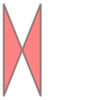

In [231]:
s = gpd.GeoSeries([Polygon([(x_SI, y_SI), (x_II,y_II), (x_SD, y_SD), (x_ID, y_ID)])])
s[0]

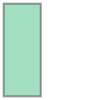

In [233]:
s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])
s[0]

In [244]:
coords[0][0]

[4435.292219237741, 6361.444031283538]

In [245]:
(x_II,y_II)

(4458.6607, 6336.5579)

In [246]:
s.rotate(cartesiana, origin=(x,y))[0].exterior.coords.xy

(array('d', [4435.292219237741, 4492.745552471664, 4512.02918076226, 4454.575847528336, 4435.292219237741]),
 array('d', [6361.444031283538, 6409.653102010028, 6386.67176871646, 6338.4626979899695, 6361.444031283538]))

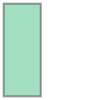

In [247]:
s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])      
            ## RESPETAR ORDEN II SI SD ID
            
s[0]            

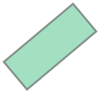

In [248]:
s.rotate(cartesiana, origin=(x,y))[0]

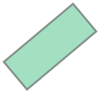

In [249]:
s.rotate(cartesiana, origin=(x,y))[0]

In [284]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)]

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAPVAL1,CAPPED1,...,CAPPED2,CAPVAL3,CAPPED3,CAPVAL4,CAPPED4,CAPVAL5,CAPPED5,CAPVAL6,CAPPED6,DUMMY_MODIF
138472,143617,4473.6607,6374.0579,4297.9178,0.50,11,11,A1979,0.50,0,...,0,0.50,0,0.50,0,0.50,0,0.50,0,0
138473,143618,4474.1533,6375.1530,4295.1687,0.50,11,11,A1979,0.50,0,...,0,0.50,0,0.50,0,0.50,0,0.50,0,0
138474,143619,4474.6436,6376.2454,4292.4180,0.50,11,11,A1979,0.50,0,...,0,0.50,0,0.50,0,0.50,0,0.50,0,0
138475,143620,4475.1323,6377.3366,4289.6665,0.50,11,11,A1979,0.50,0,...,0,0.50,0,0.50,0,0.50,0,0.50,0,0
138476,143621,4475.6194,6378.4264,4286.9142,0.50,11,11,A1979,0.50,0,...,0,0.50,0,0.50,0,0.50,0,0.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324451,338537,4523.8817,6297.9249,4238.1974,0.10,11,11,A3696,0.10,0,...,0,0.10,0,0.10,0,0.10,0,0.10,0,0
324452,338538,4522.1938,6296.1735,4235.5434,0.10,11,11,A3696,0.10,0,...,0,0.10,0,0.10,0,0.10,0,0.10,0,0
379756,398005,4222.7606,6377.0293,4155.4474,0.30,11,11,AC3,0.30,0,...,0,0.30,0,0.30,0,0.30,0,0.30,0,0
379757,398006,4224.0088,6378.8118,4153.3823,0.40,11,11,AC3,0.40,0,...,0,0.40,0,0.40,0,0.40,0,0.40,0,0


In [283]:
#       %%%%%%%%%%%%%%%%%%%%%%%%%%

breaker=0
breaker2=0


inicio = time.time()

## azimuth esta asociado a la ZONA

iterador=0

#for zone in df_parametros.Valor[12][:1]:     ## borrar   [:2]
for zone in tqdm(df_parametros.Valor[12][:1]):     #################################  FIJO PARA PRUEBA  BORRAR
    
    
    
    #print("\n")
    print("zone:",zone)
    
    #  df_parametros.Valor[13]         ## LISTA DE AZIMUTH
    print("azimuth:",df_parametros.Valor[13][iterador])
    
    
    
    azimuth=df_parametros.Valor[13][iterador]
    cartesiana=0          ## <------ 


    if azimuth < 90:

        #print(1)
        cartesiana=90-azimuth 
        print(cartesiana)

    elif azimuth < 180:
        #print(2)
        cartesiana=360-(azimuth-90) 
        print(cartesiana)

    elif azimuth < 270:
        #print(3)
        cartesiana=270-(azimuth-180) 
        print(cartesiana)


    elif azimuth < 360:
        #print(4)
        cartesiana=180-(azimuth-270) 
        print(cartesiana)
        
        
        
    print("cartesiana:",cartesiana)
    rad=math.radians(cartesiana)    ## <------  APLICAR ACA SIN COS etc etc    
    print("radian:",rad)


    
    
    
    
    
    
    #df_parametros.Valor[14]                            ## LISTA DE ANISOTROPIA 
    print("ratio anisotropia:",df_parametros.Valor[14][iterador])
    ratio=df_parametros.Valor[14][iterador]
    
    

    ###for rock in df_parametros.Valor[8][:1]:## borrar   [3]
    for rock in range(11,12):
        
        print("rock:",rock)
        print("\n")
        
        
        # $$ ITERAR COMPOSITOS:   ROCK y  ZONE  FIJO
        for obs in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:  ## ITERAR INDICES
            
            print(" index:",obs)
            
            # $$ PRINT COORDENADAS COMPOSITO
            
            x=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,1][obs]
            y=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,2][obs]
            z=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,3][obs]
             
            print("   x:",x)
            print("   y:",y)
            print("   z:",z)          
            
            
            # $$ POLIGONO x COMPÓSITO   x,y                        ###  RATIO ANISOTROPIA EN  Y
            x_SI= x - (df_parametros.Valor[3][1] / 2)
            y_SI= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_II= x - (df_parametros.Valor[3][1] / 2)
            y_II= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_SD= x + (df_parametros.Valor[3][1] / 2)
            y_SD= y + ((df_parametros.Valor[3][2]*ratio) / 2)
            
            x_ID= x + (df_parametros.Valor[3][1] / 2)
            y_ID= y - ((df_parametros.Valor[3][2]*ratio) / 2)
            
            
            print("\n")        
            print("    SI:",x_SI,y_SI)
            print("    II:",x_II,y_II)  
            print("    SD:",x_SD,y_SD) 
            print("    ID:",x_ID,y_ID)

            
    
            s = gpd.GeoSeries([Polygon([(x_II,y_II), (x_SI, y_SI), (x_SD, y_SD), (x_ID, y_ID)])])      
            ## RESPETAR ORDEN II SI SD ID
            
            s[0]
            
            s.rotate(cartesiana, origin=(x,y))[0]
            
            rx,ry = s.rotate(cartesiana, origin=(x,y))[0].exterior.coords.xy
                 
            coords = np.dstack((rx,ry)).tolist()
            
            print("\n")

            #print(coords)           
            print("     SI_r: ",coords[0][0])
            print("     II_r: ",coords[0][1])
            print("     SD_r: ",coords[0][2])
            print("     ID_r: ",coords[0][3])
            

            print("\n")
            print("\n")
            
            
            ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs]
            print("  ley: ",ley)
            
            
            
            print("\n")
            print("                 in-poligono")
            print("\n")
            
            

####################
####################  ITERACION POR COMPOSITO            
            
            
            index_inner_3d=[]## INDICES EN POLIGONO ROTADO 3D
            
            
            
            for obs_sub in df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T:
                
                
                print("                    obs    : ",obs)
                print("                    obs_sub: ",obs_sub)
                
                
                sub_ley=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].iloc[:,4][obs_sub]
                print("                    ley_sub: ",sub_ley)
                
                
####################
####################
                x_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][1]
                y_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][2]
                
                print("                    x_sub: ",x_int)
                print("                    y_sub: ",y_int)
                
                
                composito_inter= gpd.GeoSeries([Point(x_int,y_int)])
                #composito_inter[0]
                
                
                
                
                
                if s.rotate(cartesiana, origin=(x,y))[0].intersects(composito_inter[0]) == True:
                    print("                      TRUE  POLIGONO ROTADO 2D")
                    
                    z_int=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 5] == rock) & (df_CLAG_MR_2022.iloc[:, 6] == zone)].T[obs_sub][3]
                    print("                    z_sub: ",z_int)
                    
                    print("                    ",z)
                    print("                    ",z_int)
                    print("                    ",abs(z-z_int))
                    
                    z_inner_diff=abs(z-z_int)
                    
                    if z_inner_diff < ((df_parametros.Valor[3][2]*ratio) / 2):
                        print("                    EN Z 3D")
                        index_inner_3d.append(obs_sub)
                        print(index_inner_3d)
                        pass
                    
                    else:
                        pass
                        print("                    NO Z 3D <--")
                    
                else:
                    print("                      FALSE POLIGONO ROTADO 2D-")
                    #pass
            
                
                
                print("\n")
                
                
                
                
                
                
                
                
                
                '''
                ##      FRENOS   <------------------------------------------------------------
                ## $$   FRENO            UNA SOLA ROCA Y ZONA              
                breaker2=breaker2+1
                if breaker2 > 500:
                    break
                '''
            ## $$   FRENO            UNA SOLA ROCA Y ZONA         PARA UN COMPOSITO     
            breaker=breaker+1
            if breaker > 0:
                break
         
 
                
                
                
            
            print("\n\n\n\n")
                     
                
   
            
                
    ## ALTURA BUCLE ZONAS 
    iterador=iterador+1

    
fin = time.time()
print("\n\n\n")
print("Tiempo en segundos",fin-inicio)

  0%|          | 0/1 [00:00<?, ?it/s]

zone: 11
azimuth: 140
310
cartesiana: 310
radian: 5.410520681182422
ratio anisotropia: 2.5
rock: 11


 index: 138472
   x: 4473.6607
   y: 6374.0579
   z: 4297.9178


    SI: 4458.6607 6411.5579
    II: 4458.6607 6336.5579
    SD: 4488.6607 6411.5579
    ID: 4488.6607 6336.5579


     SI_r:  [4435.292219237741, 6361.444031283538]
     II_r:  [4492.745552471664, 6409.653102010028]
     SD_r:  [4512.02918076226, 6386.67176871646]
     ID_r:  [4454.575847528336, 6338.4626979899695]




  ley:  0.5


                 in-poligono


                      TRUE  POLIGONO ROTADO 2D
[138472]


                      TRUE  POLIGONO ROTADO 2D
[138472, 138473]


                      TRUE  POLIGONO ROTADO 2D
[138472, 138473, 138474]


                      TRUE  POLIGONO ROTADO 2D
[138472, 138473, 138474, 138475]


                      TRUE  POLIGONO ROTADO 2D
[138472, 138473, 138474, 138475, 138476]


                      TRUE  POLIGONO ROTADO 2D
[138472, 138473, 138474, 138475, 138476, 138477]



                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      TRUE  POLIGONO ROTADO 2D


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


       

                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-


                      FALSE POLIGONO ROTADO 2D-




# MODULOS DE PRUEBA 

In [118]:
'''
plt.figure(figsize=(8,5))
plt.plot(x,y,'.',markersize=0.05)
plt.show()

x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]

x.min(), x.max()

y.min(), y.max()
'''

"\nplt.figure(figsize=(8,5))\nplt.plot(x,y,'.',markersize=0.05)\nplt.show()\n\nx = df_CLAG_MR_2022.iloc[:,1]\ny = df_CLAG_MR_2022.iloc[:,2]\n\nx.min(), x.max()\n\ny.min(), y.max()\n"

In [119]:
'''
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')



x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]
z = df_CLAG_MR_2022.iloc[:,3]

ax.scatter3D(x, y, z, marker='o',s=0.005)
'''

"\nfig = plt.figure(figsize = (20,20))\nax = plt.axes(projection='3d')\n\n\n\nx = df_CLAG_MR_2022.iloc[:,1]\ny = df_CLAG_MR_2022.iloc[:,2]\nz = df_CLAG_MR_2022.iloc[:,3]\n\nax.scatter3D(x, y, z, marker='o',s=0.005)\n"

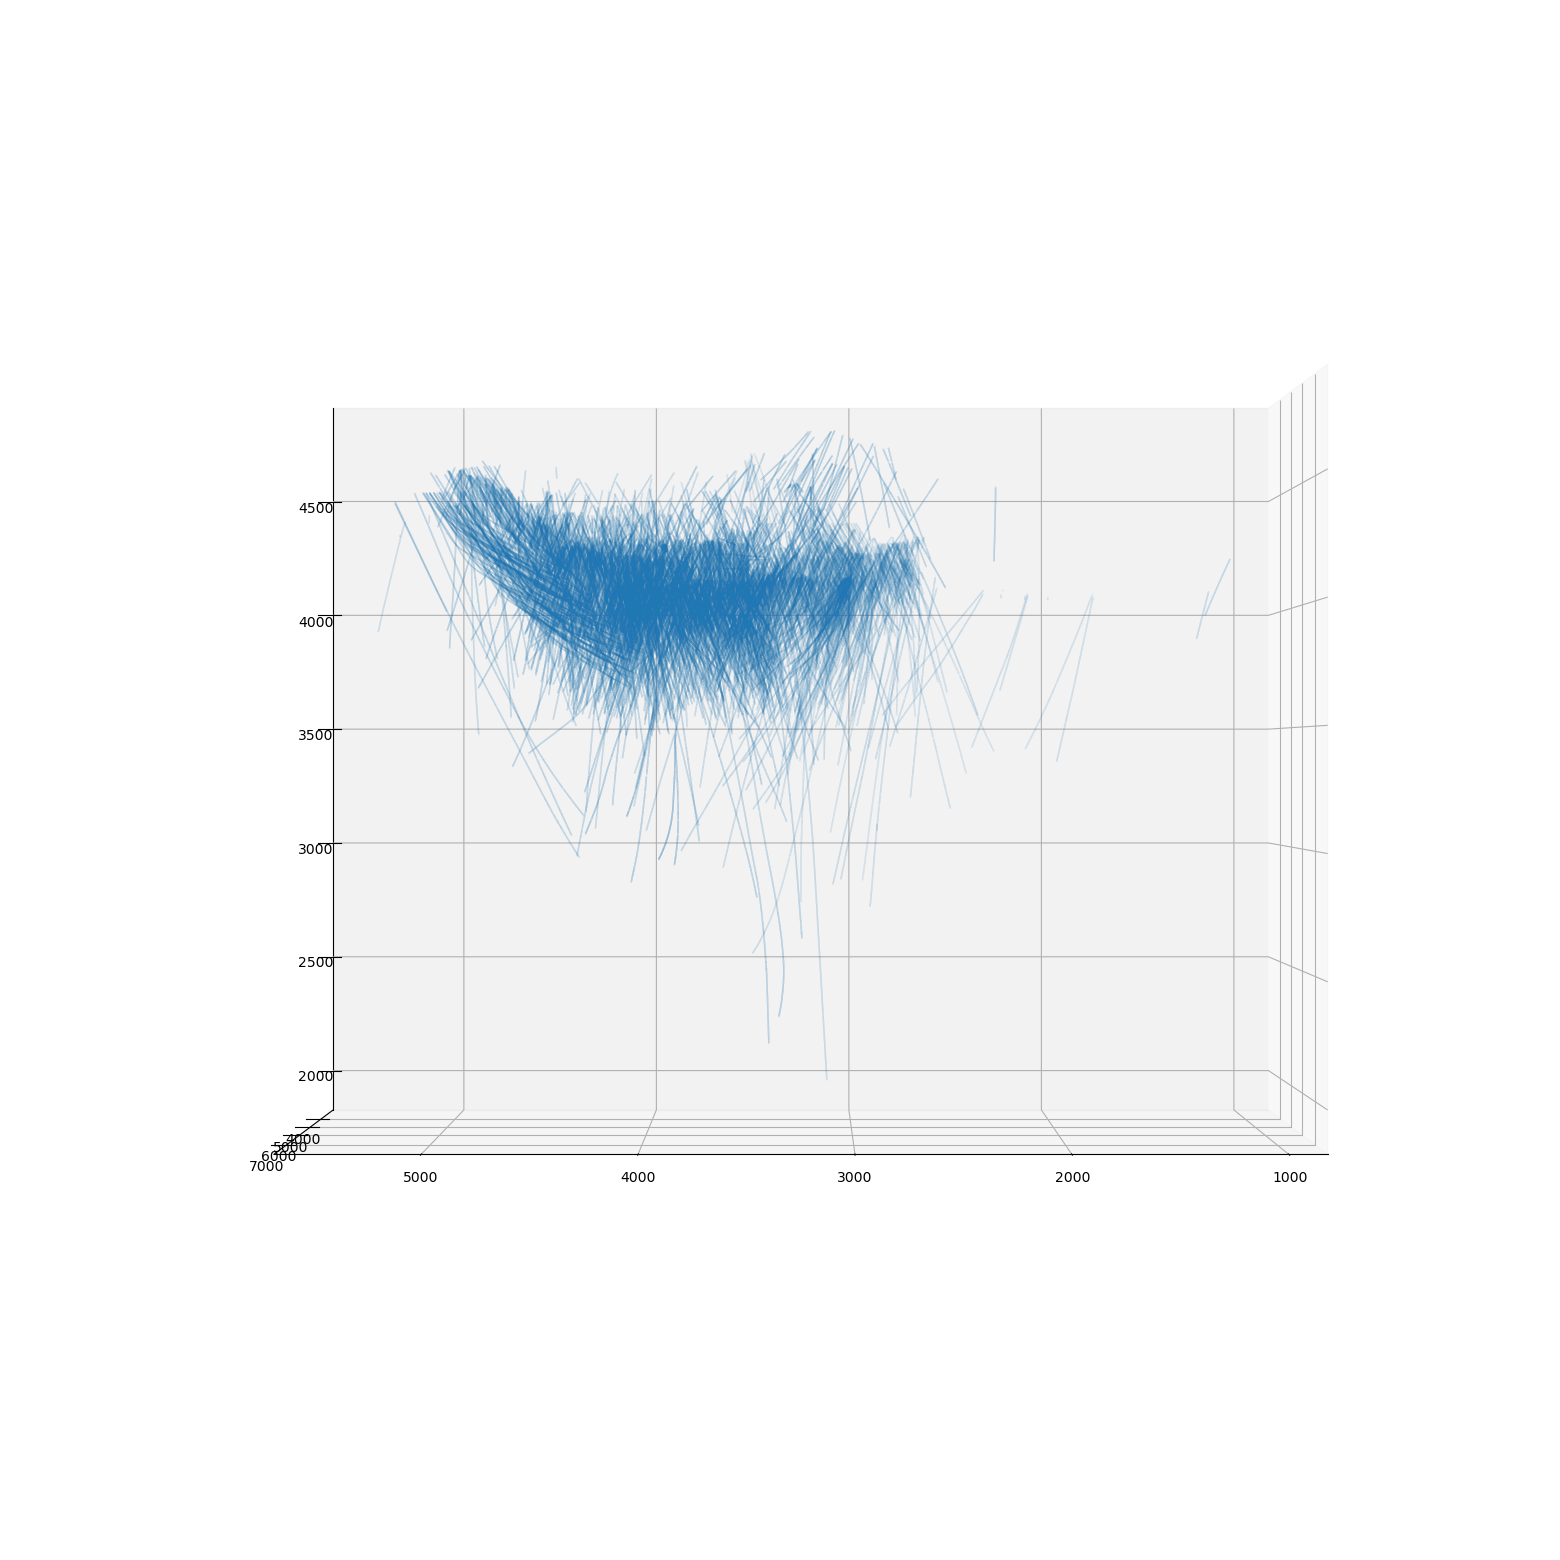

In [216]:

fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')



x = df_CLAG_MR_2022.iloc[:,1]
y = df_CLAG_MR_2022.iloc[:,2]
z = df_CLAG_MR_2022.iloc[:,3]

ax.scatter3D(x, y, z, marker='o',s=0.005)
ax.view_init(0, 90)            ## seguna coordenada PARA MOV 
plt.show()


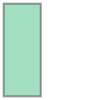

In [140]:
s = gpd.GeoSeries([Polygon([ (4458.6607,6336.5579),(4458.6607,6411.5579), (4488.6607, 6411.5579), ( 4488.6607,  6336.5579)])])
s[0]

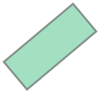

In [139]:
s = gpd.GeoSeries([Polygon([(4435.292219237741,6361.444031283538),
                            (4492.745552471664,6409.653102010028),
                            (4512.02918076226,6386.67176871646),
                            (4454.575847528336,6338.4626979899695)])])
s[0]

In [ ]:
 SI: 4458.6607 6411.5579
    II: 4458.6607 6336.5579
    SD: 4488.6607 6411.5579
    ID: 4488.6607 6336.5579


     SI_r:  [4435.292219237741, 6361.444031283538]
     II_r:  [4492.745552471664, 6409.653102010028]
     SD_r:  [4512.02918076226, 6386.67176871646]
     ID_r:  [4454.575847528336, 6338.4626979899695]


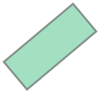

In [207]:
s = gpd.GeoSeries([Polygon([(4435.292219237741,6361.444031283538),
                            (4492.745552471664,6409.653102010028),
                            (4512.02918076226,6386.67176871646),
                            (4454.575847528336,6338.4626979899695)])])
s[0]

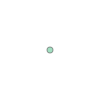

In [214]:
b= gpd.GeoSeries(
    [
        Point(4435.292219237741,6361.444031283538)
    ],
)
b[0]

s[0].intersects(b[0])

In [215]:
s[0].intersects(b[0])

True

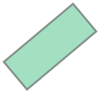

In [243]:
s.rotate(cartesiana, origin=(x,y))[0]#.intersects(b[0])